In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

## Exploração com os dados brutos

In [5]:
# Importação da base dos dados
df = pd.read_csv('../data/raw/dataset_imoveis_sp.csv')

In [6]:
# Visualização das primeiras 5 linhas
df.head(5)

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [16]:
# Visualização das últimas 5 linhas
df.tail(5)

,address,district,area,bedrooms,garage,type,rent,total
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200
11656,Rua Alexandre Dumas,Santo Amaro,110,3,1,Casa,3300,3440


In [17]:
# Tamanho da base
df.shape

(11657, 8)

In [18]:
# Verificar informações da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [ ]:
# Quantidade de valores nulos
df.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [ ]:
# Verificando informações estatísticas

# count: número de valores não nulos
# unique: valores distintos
# top: valor mais frequente (moda)
# freq: frequência do valor mais comum
# mean: média 
# std: desvio padrão
# min: valor mínimo
# 25%: primeiro quartil (Q1)
# 50%: mediana (Q2)
# 75%: terceiro quartil (Q3)
# max: valor máximo

df.describe(include='all')

,address,district,area,bedrooms,garage,type,rent,total
count,11657,11657,11657.000000,11657.000000,11657.000000,11657,11657.000000,11657.000000
unique,5348,1199,NaN,NaN,NaN,4,NaN,NaN
top,Rua da Consolação,Bela Vista,NaN,NaN,NaN,Apartamento,NaN,NaN
freq,49,352,NaN,NaN,NaN,7194,NaN,NaN
mean,NaN,NaN,84.655658,1.966286,1.060393,NaN,3250.814789,4080.030625
std,NaN,NaN,74.020536,0.931313,1.132349,NaN,2650.711557,3352.480274
min,NaN,NaN,0.000000,0.000000,0.000000,NaN,500.000000,509.000000
25%,NaN,NaN,40.000000,1.000000,0.000000,NaN,1590.000000,1996.000000
50%,NaN,NaN,60.000000,2.000000,1.000000,NaN,2415.000000,3057.000000
75%,NaN,NaN,96.000000,3.000000,2.000000,NaN,3800.000000,4774.000000


In [ ]:
# Número de valores distintos
df.nunique()

address     5348
district    1199
area         381
bedrooms       7
garage         7
type           4
rent        1662
total       5571
dtype: int64

In [5]:
# Número de vezes que cada bairro aparecem 

df['district'].value_counts().sort_index()
df['district'].value_counts().to_csv('../outputs/district_counts.csv', header=True)
pd.read_csv('../outputs/district_counts.csv')


,district,count
0,Bela Vista,352
1,Vila Mariana,232
2,Jardim Paulista,220
3,Centro,178
4,Pinheiros,159
...,...,...
1194,Nova Aldeinha,1
1195,Pacaembu.,1
1196,Parque Munhoz,1
1197,Jardim dos Prados,1


In [13]:
# Bairros que aparecem apenas com contagem 1
unique_districts = df['district'].value_counts()
unique_districts = unique_districts[unique_districts == 1]  
unique_districts.to_csv('../outputs/unique_districts.csv', header=True, index=True)
print(len(unique_districts))


340


In [ ]:
# Bairros com ocorrências maiores de 20 vezes
district_counts = df['district'].value_counts()
districts_more_than_20 = district_counts[district_counts > 20]  # Filtra bairros com mais de 20 ocorrências

print(len(districts_more_than_20))


122


## Resumo da Análise Exploratória com os dados brutos

Base de dados brutos com informações de moradias para alugar em São Paulo, no qual foi possível observar as seguintes características:

- O dataset possui 11.657 registros, com 8 colunas: 
  * address (endereço - logradouro):
  * district (bairro)
  * area (área do imóvel)
  * bedrooms (quantidade de quartos)
  * garage (número de vagas na garagem)
  * type (tipo de moradia)
  * rent (valor aluguel mensal)
  * total(custo do imóvel incluindo impostos, taxas e etc.)

- Colunas object (String): address, district e type.

- Colunas numéricas (int): area, bedrooms, garage, rent e total.

- Não possui valores nulos.

- Quantidade de valores distintos:
   * Possui 5.348 logradouros diferentes;
   * Possui 1.199 bairros diferentes;
   * Possui 381 valores diferentes de área;
   * Possui 7 valores de quantidade de quartos diferentes;
   * Possui 7 valores de vagas de garagem diferentes;
   * Possui 4 tipos de moradias diferentes;
   * Possui 1.662 valores diferentes de aluguéis;
   * Possui 5.571 valores diferentes de impostos;

- 340 bairros aparecem uma única vez no dataset
- 122 bairros aparecem mais de 20 vezes

- O endereço (logradouro) mais comum é a 'Rua da Consolação', aparecendo 49 vezes na base de dados.

- O bairro mais comum é a 'Bela Vista', aparecendo 352 vezes na base de dados. 

- O tipo de moradia mais comum é o 'Apartamento', aparecendo 7.194 vezes.




## Visualização Gráfica

### Bairros mais comuns

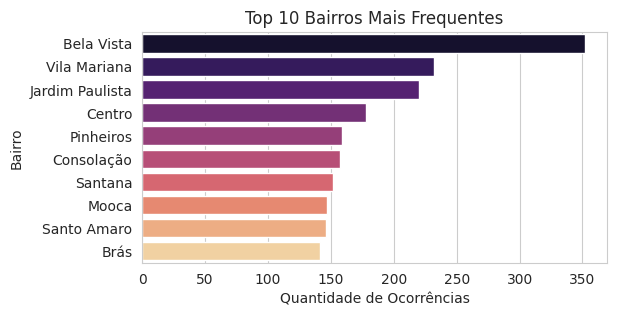

In [26]:
top_bairros = df['district'].value_counts().head(10)

plt.figure(figsize=(6, 3))
sns.barplot(x=top_bairros.values, y=top_bairros.index, hue=top_bairros.index, palette="magma", legend=False)
plt.title("Top 10 Bairros Mais Frequentes")
plt.xlabel("Quantidade de Ocorrências")
plt.ylabel("Bairro")
plt.show()

### Tipo de moradia mais comum

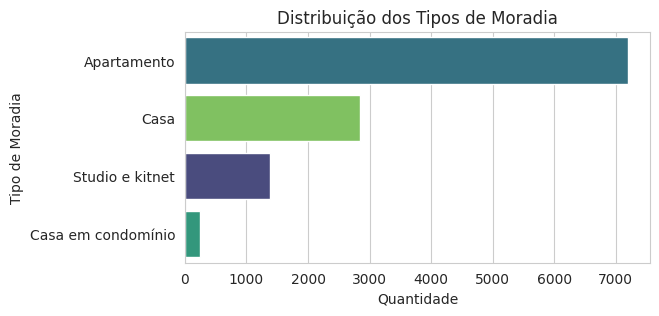

In [28]:
sns.set_style("whitegrid")

plt.figure(figsize=(6, 3))
sns.countplot(
    y=df['type'],
    order=df['type'].value_counts().index,
    hue=df['type'],
    palette='viridis',
    legend=False
)
plt.title("Distribuição dos Tipos de Moradia")
plt.xlabel("Quantidade")
plt.ylabel("Tipo de Moradia")
plt.show()

### Distribuição de área

Obs:
- maioria dos imóveis está concentrado em áreas pequenas;
- existe um pico de imóveis próximo a 50m2;
- a cauda do gráfico à direita sinaliza que existe algumas casas muito grandes, no qual se desvia da maioria da concentração dos dados (outliers).




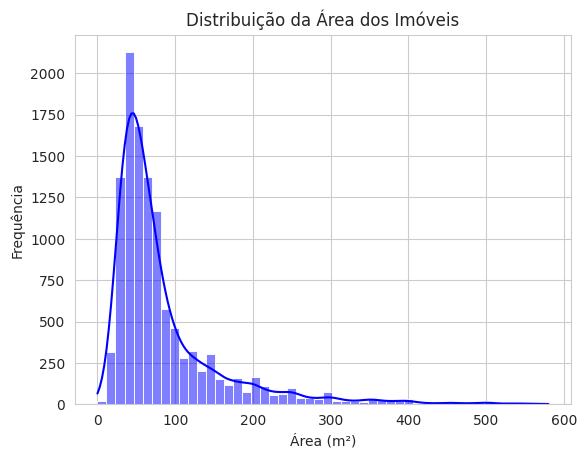

In [31]:
sns.histplot(df['area'], bins=50, kde=True, color='blue')
plt.title("Distribuição da Área dos Imóveis")
plt.xlabel("Área (m²)")
plt.ylabel("Frequência")
plt.show()



### Distribuição do Aluguel

Obs:
- a maioria dos aluguéis está concentrado abaixo de R$ 5.000;
- o pico de valor de aluguel mais comum está aproximadamente entre R$ 2.500;
- presença de alguns imóveis com valores muito superiores a média (outliers).


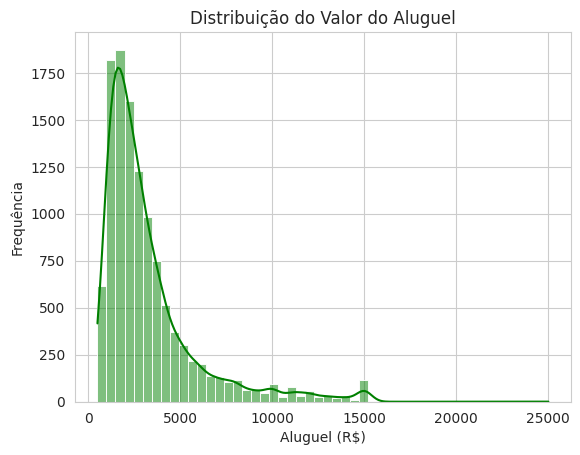

In [33]:
sns.histplot(df['rent'], bins=50, kde=True, color='green')
plt.title("Distribuição do Valor do Aluguel")
plt.xlabel("Aluguel (R$)")
plt.ylabel("Frequência")
plt.show()

### Distribuição do Custo Total

Obs:
- o pico de distribuição está proximo de R$ 2.000;
- poucos imóveis tem custos acima de R$ 15.000.

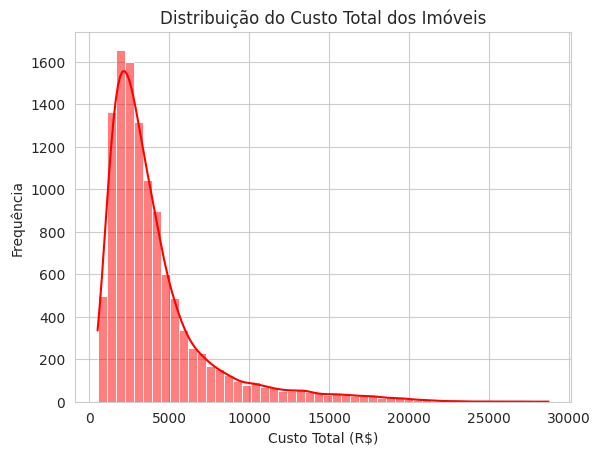

In [34]:
sns.histplot(df['total'], bins=50, kde=True, color='red')
plt.title("Distribuição do Custo Total dos Imóveis")
plt.xlabel("Custo Total (R$)")
plt.ylabel("Frequência")
plt.show()

### Relação entre as variáveis numéricas (área, quartos, aluguel, total)

Obs:
- área vs quartos(0.73) e área vs garagem(0.73): indicam que imóveis maiores tendem a ter mais quartos e vagas;

- imóveis maiores tem aluguéis mais altos, com correlção de 0.67 entre aluguél vs área;

- o número de vagas de garagem impacta mais que o número de quartos no aluguel.

- taxas e impostos(total) são proporcionais ao aluguel.

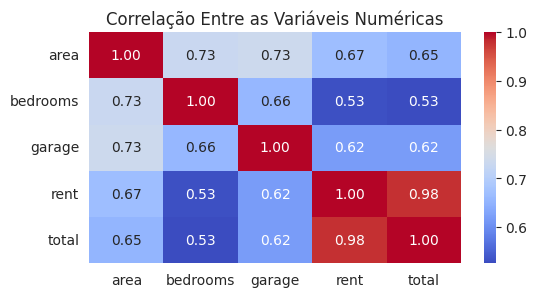

In [37]:
plt.figure(figsize=(6, 3))
sns.heatmap(df[['area', 'bedrooms', 'garage', 'rent', 'total']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação Entre as Variáveis Numéricas")
plt.show()


In [43]:
df = pd.read_csv('../data/raw/dataset_imoveis_sp.csv')

profile = ProfileReport(df, explorative=True)

profile.to_file("../outputs/relatorio_dados_brutos.html")

profile.to_notebook_iframe()

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 223.68it/s]
